In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [4]:
train_idx = train.shape[0]
test_idx = test.shape[0]

In [5]:
print(train_idx)
print(test_idx)

13730
4576


In [6]:
# inscrição para salvar no arquivo final
inscricao = test.NU_INSCRICAO

In [8]:
# Concatenando treino e teste
base = pd.concat(objs=[train, test], axis=0, sort=False).reset_index(drop=True)
print('base concatenada: {} x {}'.format(base.shape[0], base.shape[1]))

base concatenada: 18306 x 167


In [9]:
features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'Q006',
    'Q024',
    'Q025',
    'Q047'
]

features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'Q006',
    'Q024',
    'Q025',
    'Q047'
]

In [10]:
base[features_corr].isnull().sum()

NU_NOTA_MT         8173
NU_NOTA_CN         4523
NU_NOTA_CH         4523
NU_NOTA_LC         4796
NU_NOTA_REDACAO    4796
NU_NOTA_COMP1      4796
NU_NOTA_COMP2      4796
NU_NOTA_COMP3      4796
NU_NOTA_COMP4      4796
NU_NOTA_COMP5      4796
Q006                  0
Q024                  0
Q025                  0
Q047                  0
dtype: int64

In [11]:
labelencoder1 = LabelEncoder()
labelencoder2 = LabelEncoder()
labelencoder3 = LabelEncoder()
labelencoder4 = LabelEncoder()
labelencoder11 = LabelEncoder()
labelencoder22 = LabelEncoder()
labelencoder33 = LabelEncoder()
labelencoder44 = LabelEncoder()

In [12]:
train['Q006'] = labelencoder1.fit_transform(train['Q006'])
train['Q024'] = labelencoder2.fit_transform(train['Q024'])
train['Q025'] = labelencoder3.fit_transform(train['Q025'])
train['Q047'] = labelencoder4.fit_transform(train['Q047'])
base['Q006'] = labelencoder11.fit_transform(base['Q006'])
base['Q024'] = labelencoder22.fit_transform(base['Q024'])
base['Q025'] = labelencoder33.fit_transform(base['Q025'])
base['Q047'] = labelencoder44.fit_transform(base['Q047'])

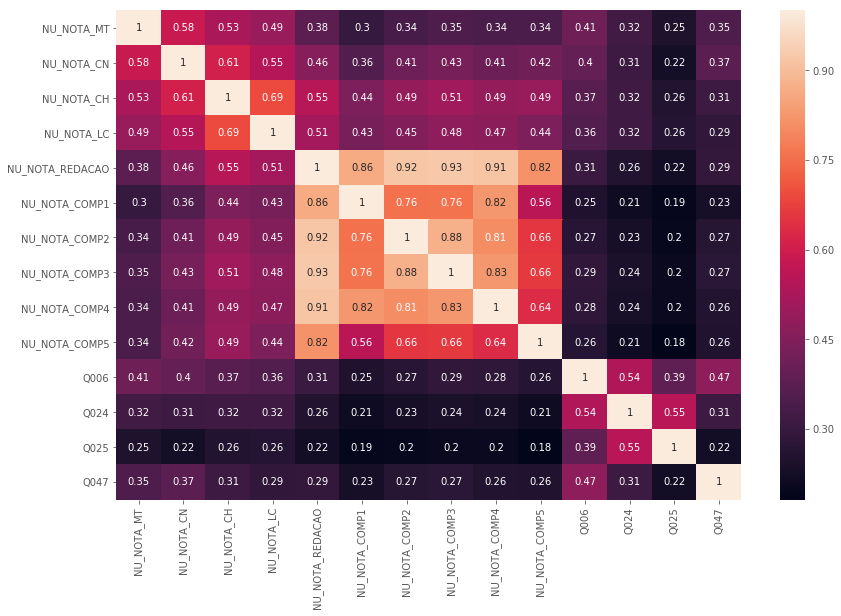

In [13]:
# Correlação antes de tratar os valores nulos
corr = train[features_corr].corr()
ax = plt.subplots(figsize=(14,9))
sns.heatmap(corr, annot=True)

In [14]:
base.loc[base['TP_PRESENCA_LC']==0, 'NU_NOTA_REDACAO'] = base.loc[base['TP_PRESENCA_LC']==0, 'NU_NOTA_REDACAO'].fillna(0)
base.loc[base['TP_PRESENCA_LC']==0, 'NU_NOTA_LC'] = base.loc[base['TP_PRESENCA_LC']==0, 'NU_NOTA_LC'].fillna(0)
base.loc[base['TP_PRESENCA_LC']==0, 'NU_NOTA_COMP1'] = base.loc[base['TP_PRESENCA_LC']==0, 'NU_NOTA_COMP1'].fillna(0)
base.loc[base['TP_PRESENCA_LC']==0, 'NU_NOTA_COMP2'] = base.loc[base['TP_PRESENCA_LC']==0, 'NU_NOTA_COMP2'].fillna(0)
base.loc[base['TP_PRESENCA_LC']==0, 'NU_NOTA_COMP3'] = base.loc[base['TP_PRESENCA_LC']==0, 'NU_NOTA_COMP3'].fillna(0)
base.loc[base['TP_PRESENCA_LC']==0, 'NU_NOTA_COMP4'] = base.loc[base['TP_PRESENCA_LC']==0, 'NU_NOTA_COMP4'].fillna(0)
base.loc[base['TP_PRESENCA_LC']==0, 'NU_NOTA_COMP5'] = base.loc[base['TP_PRESENCA_LC']==0, 'NU_NOTA_COMP5'].fillna(0)
base.loc[base['TP_PRESENCA_CH']==0, 'NU_NOTA_CH'] = base.loc[base['TP_PRESENCA_CH']==0, 'NU_NOTA_CH'].fillna(0)
base.loc[base['TP_PRESENCA_CN']==0, 'NU_NOTA_CN'] = base.loc[base['TP_PRESENCA_CN']==0, 'NU_NOTA_CN'].fillna(0)
base.loc[base['TP_PRESENCA_MT']==0, 'NU_NOTA_MT'] = base.loc[base['TP_PRESENCA_MT']==0, 'NU_NOTA_MT'].fillna(0)

In [15]:
base[features_corr].isnull().sum()

NU_NOTA_MT         4581
NU_NOTA_CN            9
NU_NOTA_CH            9
NU_NOTA_LC            9
NU_NOTA_REDACAO       9
NU_NOTA_COMP1         9
NU_NOTA_COMP2         9
NU_NOTA_COMP3         9
NU_NOTA_COMP4         9
NU_NOTA_COMP5         9
Q006                  0
Q024                  0
Q025                  0
Q047                  0
dtype: int64

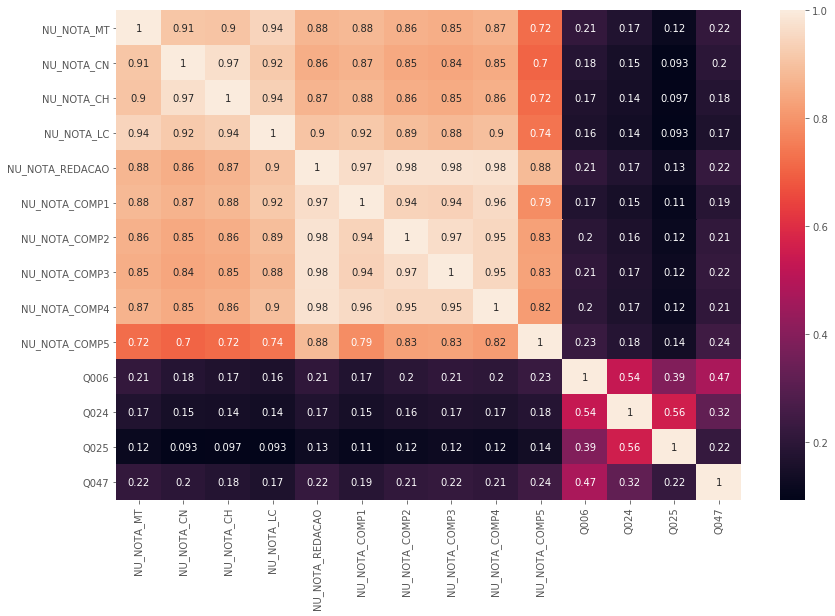

In [16]:
# Correlação depois de tratar os valores nulos
corr = base[features_corr].corr()
ax = plt.subplots(figsize=(14,9))
sns.heatmap(corr, annot=True)

In [17]:
mediana = base[['NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']].median()
base[['NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_COMP1',
      'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']] = base[['NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_COMP1',
                                                                                'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']].fillna(mediana)

In [18]:
#base[['NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']].isnull().sum()
base[['NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_COMP1',
      'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']].isnull().sum()

NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

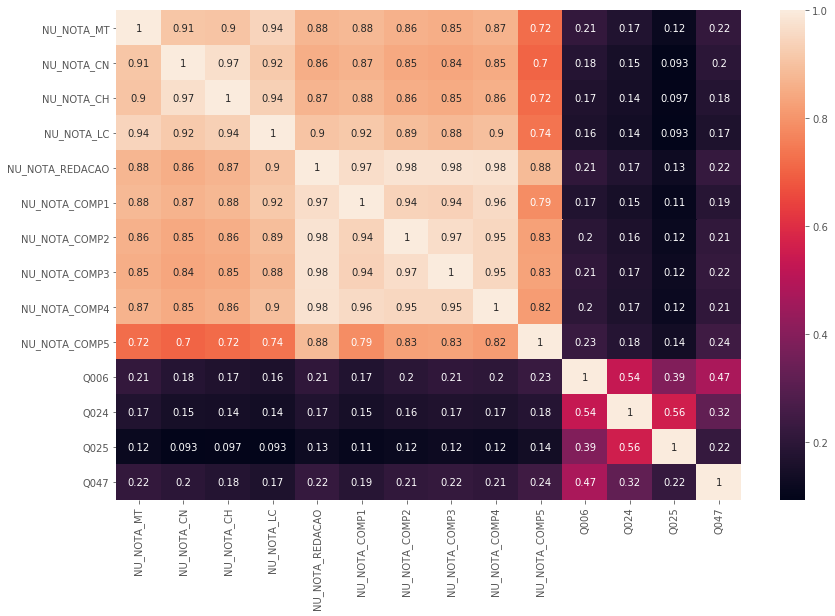

In [19]:
# Correlação depois de tratar os valores nulos faltantes de NU_NOTA_COMPX
corr = base[features_corr].corr()
ax = plt.subplots(figsize=(14,9))
sns.heatmap(corr, annot=True)

In [20]:
train = base.iloc[:train_idx]
test = base.iloc[train_idx:]

In [21]:
test = test[['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']]

In [22]:
print(train.shape)
print(test.shape)

(13730, 167)
(4576, 47)


In [23]:
train[features].isnull().sum()

NU_NOTA_CN         9
NU_NOTA_CH         9
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
Q006               0
Q024               0
Q025               0
Q047               0
dtype: int64

In [24]:
train[features_corr].isnull().sum()

NU_NOTA_MT         5
NU_NOTA_CN         9
NU_NOTA_CH         9
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
Q006               0
Q024               0
Q025               0
Q047               0
dtype: int64

In [26]:
test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
Q006               0
Q024               0
Q025               0
Q047               0
dtype: int64

In [27]:
mediana1 = train[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH']].median()
base[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH']] = base[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH']].fillna(mediana1)

In [28]:
train[features_corr].isnull().sum()

NU_NOTA_MT         0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
Q006               0
Q024               0
Q025               0
Q047               0
dtype: int64

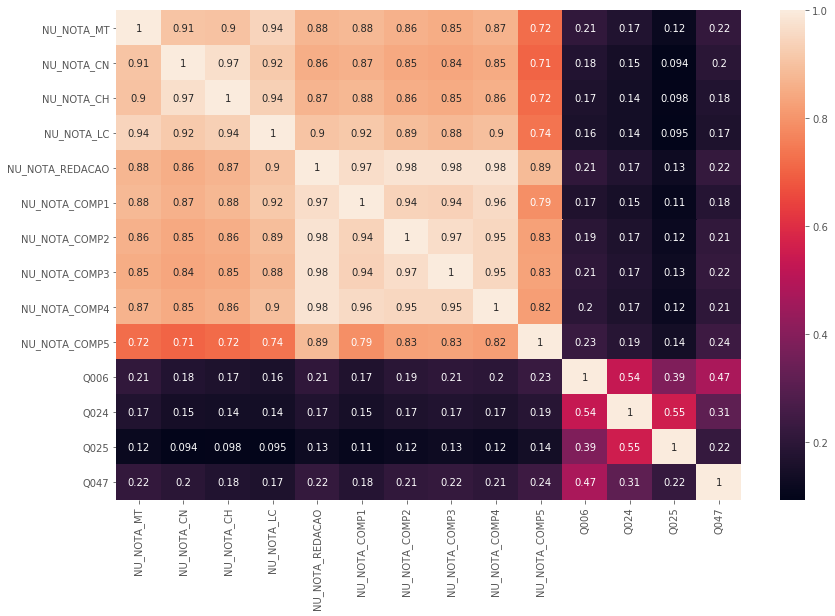

In [30]:
# Correlação depois de tratar TODOS os valores nulos
corr = train[features_corr].corr()
ax = plt.subplots(figsize=(14,9))
sns.heatmap(corr, annot=True)

**Utilizando Regressão Linear - 92,74%**

In [33]:
target = train['NU_NOTA_MT']

In [31]:
modelo = LinearRegression()

In [47]:
features_teste = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5'
]

In [48]:
modelo.fit(train[features_teste], target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
modelo.coef_

array([ 3.29178995e-01, -1.10783014e-01,  6.67755040e-01,  1.82931251e+11,
       -1.82931251e+11, -1.82931251e+11, -1.82931251e+11, -1.82931251e+11,
       -1.82931251e+11,  3.16581438e+00,  2.60865149e+00, -4.22670366e-01,
        5.44298710e+00])

In [50]:
modelo.intercept_

-12.065055262027158

In [51]:
modelo.score(train[features], target)

0.9057655063859867

In [45]:
treinado = modelo.predict(test[features])
treinado

array([418.086886  , 475.88614837, 560.04415025, ..., 605.79498655,
       482.98922975,  -9.87907414])

In [44]:
submission = pd.DataFrame({
    'NU_INSCRICAO': test.NU_INSCRICAO,
    'NU_NOTA_MT': treinado
})

In [46]:
submission.to_csv('answer.csv', index=False)

**Utilizando Random Forest - 96,6%**

In [55]:
rfr = RandomForestRegressor(
    n_estimators=100,
    criterion='mae',
    max_depth=5,
    n_jobs=-1,
    random_state=0
)

In [70]:
rfr.fit(train[features_teste], target)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [71]:
treinado_test = rfr.predict(test[features_teste])
treinado_treino = rfr.predict(train[features_teste])

In [72]:
print('MAE:', metrics.mean_absolute_error(target, treinado_treino).round(8)  )
print('MSE:', metrics.mean_squared_error(target, treinado_treino).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(target, treinado_treino)).round(8))

MAE: 42.12742946
MSE: 3962.07361824
RMSE: 62.94500471


In [67]:
rfr.score(train[features], target)

0.9242741178769569

In [73]:
rfr.score(train[features_teste], target)

0.9242741178769569

In [68]:
submission_rfr = pd.DataFrame({
    'NU_INSCRICAO': test.NU_INSCRICAO,
    'NU_NOTA_MT': treinado_test
})

In [69]:
submission_rfr.to_csv('answer.csv', index=False)